# <font color=blue>Assignments for "Data Cleaning - Outliers"</font>

In this assignment, you continue to study the data of the `US Education System`. Again, please down it from here ([dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home)). In this dataset, there is a lot of data on an annual basis. You can reach the explanations of this data from Kaggle again.

First of all, apply the most appropriate one of the techniques for completing the missing values in your previous lesson. In order to answer the following questions, you must overcome the missing data.

In [29]:
import pandas as pd 

states=pd.read_csv("data\states_all.csv",index_col="PRIMARY_KEY", low_memory=False)


# to make a meaningful filling of missing values by interpolation 
# we first sort by year and we apply interpolation for each state differently

states.sort_values(["YEAR"])

for stt in states.STATE.unique():
    for column in states.columns:
        if states[column].isnull().sum()>0:
            states.loc[ states.STATE==stt,column]= states.loc[ states.STATE==stt,column].interpolate()



states.head()

states.isnull().sum()*100 / states.shape[0]



STATE                            0.000000
YEAR                             0.000000
ENROLL                           4.839650
TOTAL_REVENUE                    1.865889
FEDERAL_REVENUE                  1.865889
STATE_REVENUE                    1.865889
LOCAL_REVENUE                    1.865889
TOTAL_EXPENDITURE                1.865889
INSTRUCTION_EXPENDITURE          1.865889
SUPPORT_SERVICES_EXPENDITURE     1.865889
OTHER_EXPENDITURE                4.839650
CAPITAL_OUTLAY_EXPENDITURE       1.865889
GRADES_PK_G                      2.448980
GRADES_KG_G                      1.865889
GRADES_4_G                       1.865889
GRADES_8_G                       1.865889
GRADES_12_G                      1.865889
GRADES_1_8_G                    16.734694
GRADES_9_12_G                   16.734694
GRADES_ALL_G                     1.865889
AVG_MATH_4_SCORE                 5.014577
AVG_MATH_8_SCORE                 5.014577
AVG_READING_4_SCORE              4.081633
AVG_READING_8_SCORE             21

1. See `TOTAL_REVENUE`, which includes total revenue data, and `TOTAL_EXPENDITURE`, which includes total spending data. Do these variables contain outliers?

In [ ]:
#because  these columns still have some missing values, and this causes error on box plot. we can siply use dropna before ploting...

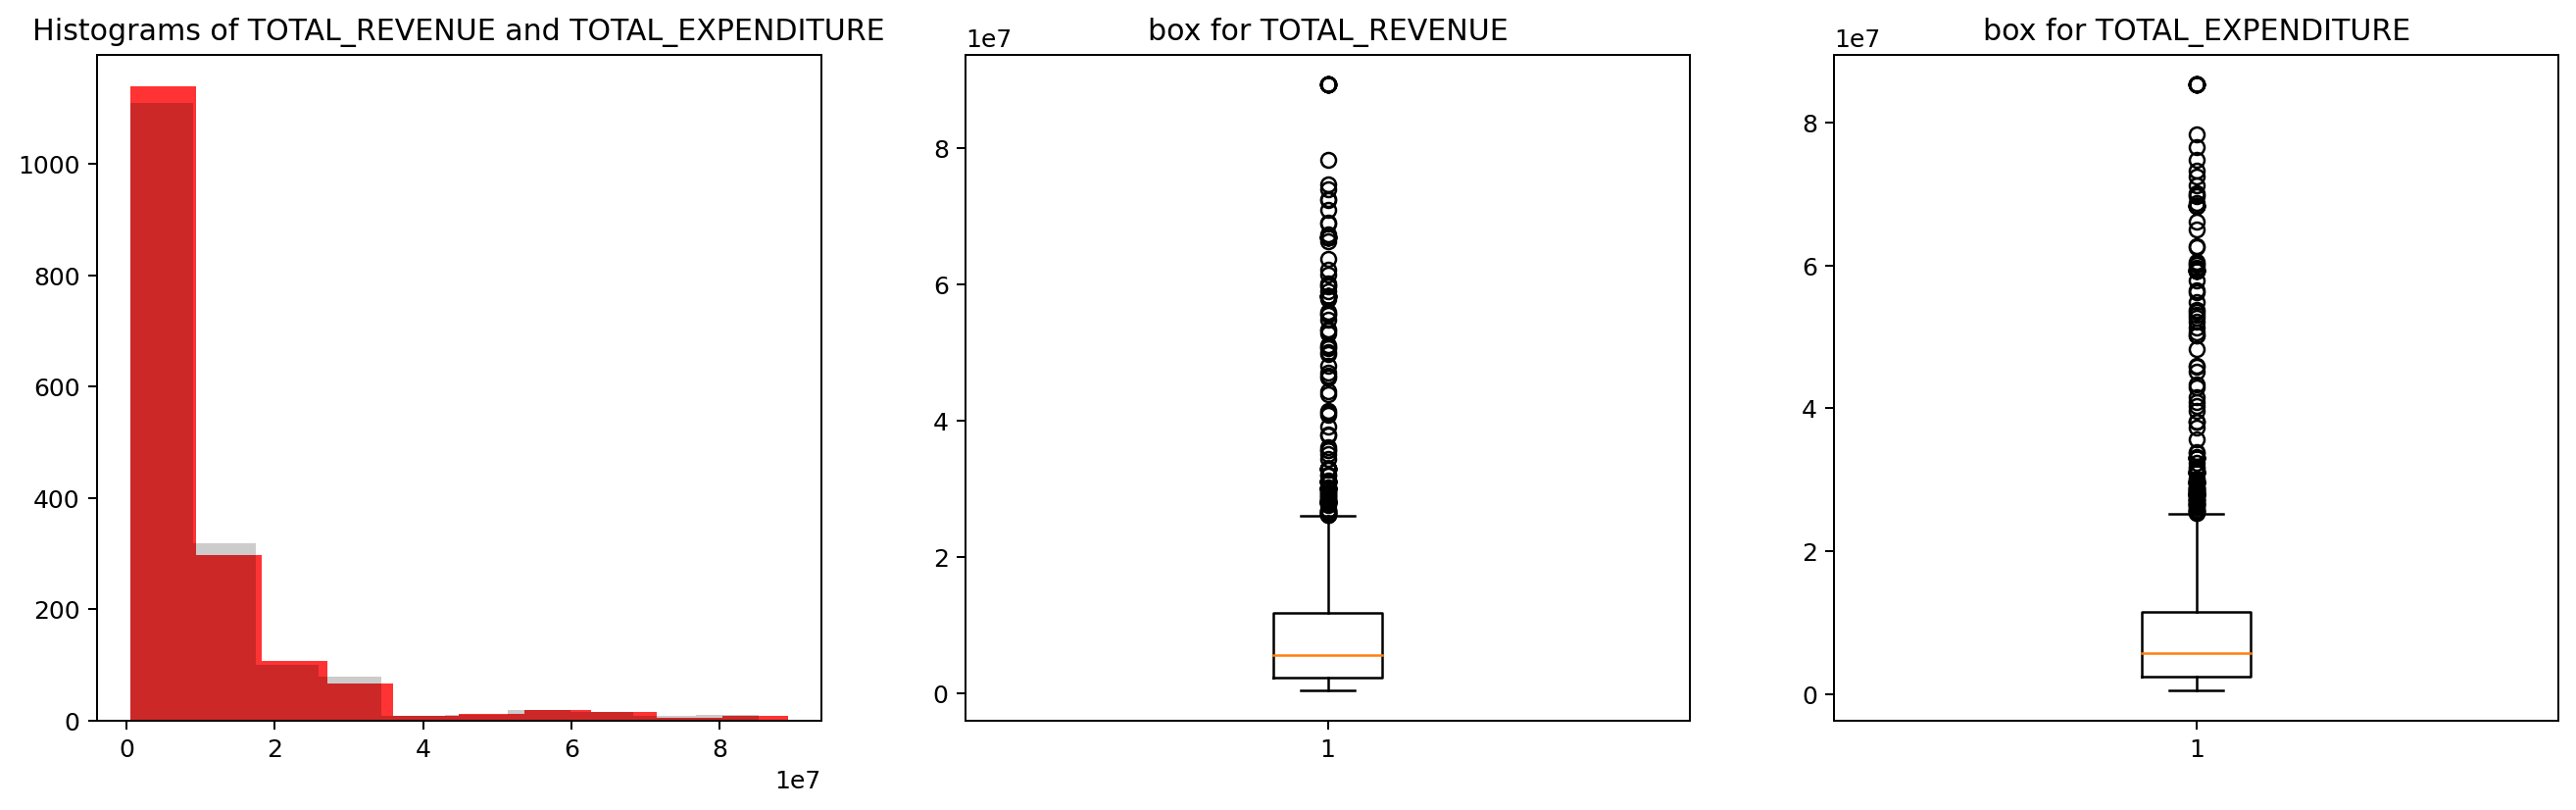

In [31]:

import matplotlib.pyplot as plt 

tr=states["TOTAL_REVENUE"].dropna()

#tr[tr.isnull()] #.sum()

# tr.describe()

te=states["TOTAL_EXPENDITURE"].dropna()
te

plt.figure(figsize=(18,5),dpi=180)

plt.subplot(1,3,1)
plt.hist(tr,alpha=.8,color="red")
plt.hist(te,alpha=.2,color="black")
plt.title("Histograms of TOTAL_REVENUE and TOTAL_EXPENDITURE")

plt.subplot(1,3,2)
plt.boxplot(tr)
plt.title("box for TOTAL_REVENUE")

plt.subplot(1,3,3)
plt.boxplot(te)
plt.title("box for TOTAL_EXPENDITURE")

plt.show()


In [ ]:
# histogram not shows accuratly that "there are outliers", but as shown in box plot there are a large number of outliers.

2. If you find outliers in the total income `TOTAL_REVENUE` and total expenditure `TOTAL_EXPENDITURE` variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

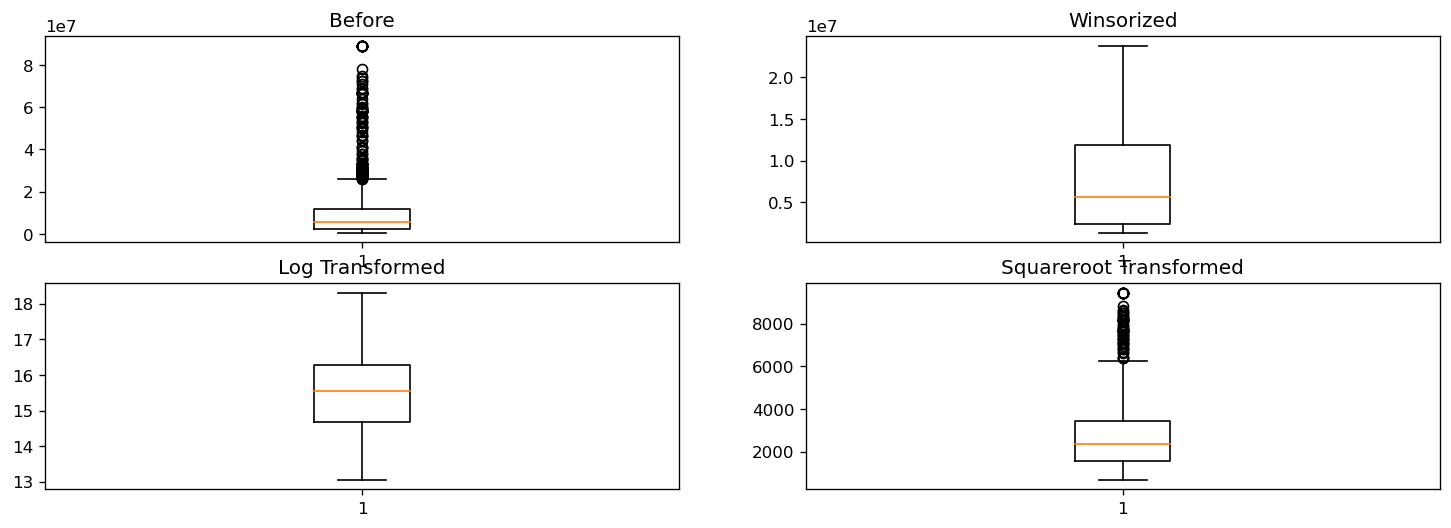

In [56]:
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize 
import numpy as np 

# Classifying =>  WINSORIZING... 

tr=states["TOTAL_REVENUE"].dropna()

np.array(tr)

plt.figure(figsize=(15,5),dpi=120)

plt.subplot(2,2,1)
plt.boxplot(tr)
plt.title("Before")
tr_winsorized=winsorize(np.array(tr),(0.10,0.10))

plt.subplot(2,2,2)
plt.boxplot(tr_winsorized)
plt.title("Winsorized")


# TRANSFORMING -> Log transform.. 
tr_log_transformed=np.log(tr)
plt.subplot(2,2,3)
plt.boxplot(tr_log_transformed)
plt.title("Log Transformed")

# TRANSFORMING -> Log transform.. 
tr_sqrt_transformed=np.sqrt(tr)
plt.subplot(2,2,4)
plt.boxplot(tr_sqrt_transformed)
plt.title("Squareroot Transformed")



plt.show()

In [57]:
#   Winsorizing and Log Transform techniques removed all outliners, but squereroot trasnform reduced but still remained outliners.


3. Subtract the total expenditure `TOTAL_EXPENDITURE` from the total income variable `TOTAL_REVENUE` to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

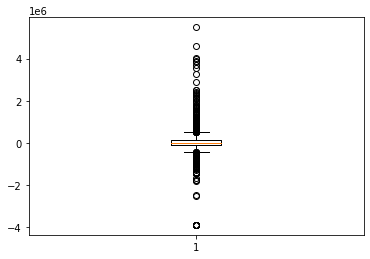

In [60]:
states["BUDGET_DEFICIT"]=states["TOTAL_EXPENDITURE"].dropna() - states["TOTAL_REVENUE"].dropna()

states["BUDGET_DEFICIT"]

plt.boxplot(states["BUDGET_DEFICIT"].dropna())
plt.show()

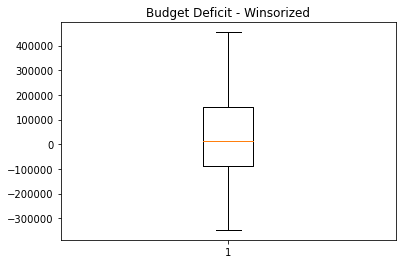

In [69]:
# Yes. Lart number of outliers exists for the new variable "BUDGET_DEFICIT"

bd=states["BUDGET_DEFICIT"].dropna()
bd_winsorized=winsorize(np.array(bd),(0.10,0.10))

plt.boxplot(bd_winsorized)
plt.title("Budget Deficit - Winsorized") 
plt.show()


In [ ]:
# by winsorizing new variable "Budget deficit" cleared from outliers values.

4. Again create a variable that can be considered as a budget deficit by subtracting the total income `TOTAL_REVENUE` variable from the total expenditure `TOTAL_EXPENDITURE`. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

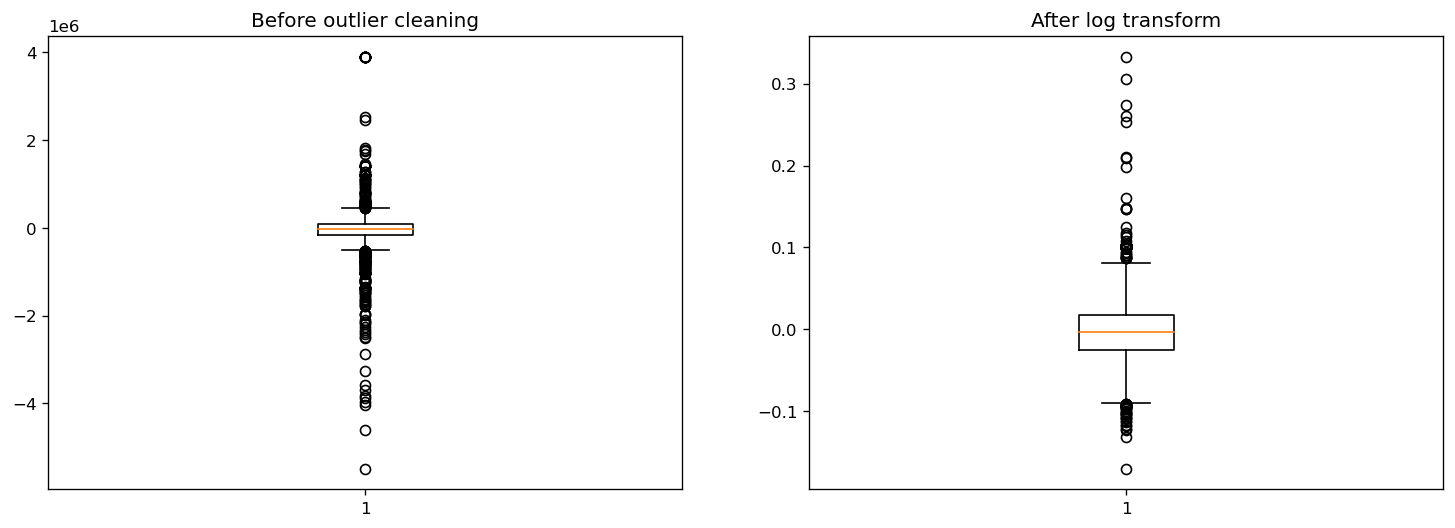

In [77]:
states["BUDGET_DEFICIT1"]=states["TOTAL_REVENUE"].dropna()- states["TOTAL_EXPENDITURE"].dropna()


plt.figure(figsize=(15,5),dpi=120)

plt.subplot(1,2,1)
plt.boxplot(states["BUDGET_DEFICIT1"].dropna())
plt.title("Before outlier cleaning")


tr_loged=np.log(states["TOTAL_REVENUE"].dropna()) 
te_loged=np.log( states["TOTAL_EXPENDITURE"].dropna()) 

states["BUDGET_DEFICIT"]=tr_loged - te_loged

plt.subplot(1,2,2)
plt.boxplot(states["BUDGET_DEFICIT"].dropna())
plt.title("After log transform")

plt.show()

In [ ]:
# We calculated  "Budget Deficit" after cleaning outliers for "Revenue" and "Expenditure", 
# Resulting data still have still outliers but these values shows us critical budget deficits exists in this points
# so we should not clean these outliers, these are valueable outliers like in fraud values in finance data.


5. Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

In [78]:
#  we created firts budget variable with outliers exists in revenue and expenditure columns.  
#  Outliers in revenue and expenditure columns may be cause of some error so may be cleaned. 
# Second variable created after cleaning outliers in revenue and expenditure columns 
# so the outliers in this second variable may be the indicator of a meaningful data (critical budget deficits)

var1=states["BUDGET_DEFICIT1"].dropna().head(5)
var2=states["BUDGET_DEFICIT"].dropna().head(5)

display(var1)
display(var2)

# also because of the outlier cleaning process, the second variable does not contains real budged deficit values, but can be used in analysis. 


PRIMARY_KEY
1992_ALABAMA        25087.0
1992_ALASKA         77103.0
1992_ARIZONA      -143501.0
1992_ARKANSAS      -31063.0
1992_CALIFORNIA   -878807.0
Name: BUDGET_DEFICIT1, dtype: float64

PRIMARY_KEY
1992_ALABAMA       0.009409
1992_ALASKA        0.076298
1992_ARIZONA      -0.043102
1992_ARKANSAS     -0.017982
1992_CALIFORNIA   -0.032918
Name: BUDGET_DEFICIT, dtype: float64

6. If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?

In [ ]:
# I think the method applied in the fourth question is better. Because with outliers exists in the source columns (revenue and expenditure)
#  the resulting budget deficit values will be missleading. After cleaning outliers and than calculating budget deficit will be better.